# How Player Height Affects the NBA
### Analysis Team
*Lindsay Reynolds, Nick Sheets*

In [1]:
%matplotlib notebook

In [2]:
# Set up dependencies and read in csv files needed
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import stats
from scipy.stats import linregress

In [3]:
# Read in csv file including rows for each season for each player (from data cleanup notebook)
nba_stats_breakout_by_season_path = os.path.join("Output_files_for_analysis", "player_stats_breakout_by_season.csv")
nba_stats_breakout_by_season_df = pd.read_csv(nba_stats_breakout_by_season_path).drop(['Unnamed: 0'], axis=1)

# This df has a player's row for each season across the three seasons examined
nba_stats_breakout_by_season_df

,season,player_name,height (in),pts,reb,ast,college,country,team
0,2016-17,AJ Hammons,84.0,2.2,1.6,0.2,Purdue,USA,DAL
1,2017-18,Aaron Brooks,72.0,2.3,0.5,0.6,Oregon,USA,MIN
2,2016-17,Aaron Brooks,72.0,5.0,1.1,1.9,Oregon,USA,IND
3,2018-19,Aaron Gordon,81.0,16.0,7.4,3.7,Arizona,USA,ORL
4,2016-17,Aaron Gordon,81.0,12.7,5.1,1.9,Arizona,USA,ORL
...,...,...,...,...,...,...,...,...,...
1551,2017-18,Zaza Pachulia,83.0,5.4,4.7,1.6,None,Georgia,GSW
1552,2018-19,Zaza Pachulia,83.0,3.9,3.9,1.3,None,Georgia,DET
1553,2018-19,Zhaire Smith,76.0,6.7,2.2,1.7,Texas Tech,USA,PHI
1554,2017-18,Zhou Qi,85.0,1.2,1.2,0.1,None,China,HOU


In [4]:
# Read in stats csv file for averages per player across the three seasons (from data cleanup notebook)
player_stats_path = os.path.join("Output_files_for_analysis", "player_stats.csv")
nba_stats_df = pd.read_csv(player_stats_path).drop(['Unnamed: 0'], axis=1)

# To display data consistently
pd.options.display.float_format = "{:.2f}".format

nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00,2.20,1.60,0.20,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.00,3.65,0.80,1.25,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.00,3.45,1.65,0.90,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.00,0.00,0.00,0.00,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.00,14.30,7.45,1.95,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00,5.13,4.83,1.60,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.00,6.70,2.20,1.70,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [5]:
# Read in csv file including salary from data exploration/cleanup process
nba_stats_with_salary_path = os.path.join("Output_files_for_analysis", "player_stats_with_sal.csv")
nba_stats_with_salary_df = pd.read_csv(nba_stats_with_salary_path).drop(['Unnamed: 0'], axis=1)

nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21 Salary ($),2020-21 Salary (Millions)
0,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,18136364.00,18.14
1,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,2345640.00,2.35
2,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,1752950.00,1.75
3,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,27500000.00,27.50
4,Al-Farouq Aminu,81.00,9.13,7.50,1.37,Wake Forest,USA,POR,9720900.00,9.72
...,...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.00,10.93,6.63,1.97,Kentucky,USA,SAC,4000000.00,4.00
320,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,321893.00,0.32
321,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,5406255.00,5.41
322,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,19500000.00,19.50


## Data Analysis  
#### Statistics
Analyze the number of players in the data frames  
Use .describe() to see important calculations  
Calculate the mean, median and mode


In [6]:
players = nba_stats_df["player_name"].unique()
print(f"For the three seasons examined there are a total of {len(players)} different players.")

For the three seasons examined there are a total of 748 different players.


In [7]:
players_nba_stats_with_2020_21_salaries = len(nba_stats_with_salary_df)
print (f"For the three seasons examined there are {players_nba_stats_with_2020_21_salaries} players with salaries for the 2020-21 season.")

For the three seasons examined there are 324 players with salaries for the 2020-21 season.


In [8]:
# See general analysis of the stats df including min and max heights
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.00,748.00,748.00,748.00
mean,78.87,7.20,3.09,1.62
std,3.36,5.46,2.24,1.57
min,69.00,0.00,0.00,0.00
25%,76.00,3.30,1.50,0.60
50%,79.00,5.80,2.58,1.10
75%,81.00,9.47,3.95,2.10
max,87.00,31.87,15.13,10.47


In [9]:
# Look at more stats, including unique values for college and country
nba_stats_df.describe(include="all")

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
count,748,748.00,748.00,748.00,748.00,748,748,748,748
unique,748,nan,nan,nan,nan,161,50,30,6
top,Danny Green,nan,nan,nan,nan,None,USA,ATL,"6'7"" - 6'9"""
freq,1,nan,nan,nan,nan,149,589,30,233
mean,NaN,78.87,7.20,3.09,1.62,NaN,NaN,NaN,NaN
std,NaN,3.36,5.46,2.24,1.57,NaN,NaN,NaN,NaN
min,NaN,69.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,NaN,76.00,3.30,1.50,0.60,NaN,NaN,NaN,NaN
50%,NaN,79.00,5.80,2.58,1.10,NaN,NaN,NaN,NaN
75%,NaN,81.00,9.47,3.95,2.10,NaN,NaN,NaN,NaN


In [10]:
# Explore mean, median, mode for heights in nba_stats_df
heights = nba_stats_df["height (in)"]

mean_heights_numpy = np.mean(heights)                       
median_heights_numpy = np.median(heights)
mode_heights_numpy = stats.mode(heights)

print(f"The mean of heights is {mean_heights_numpy}\n\
The median of heights is {median_heights_numpy}\n\
The mode of the heights is {mode_heights_numpy}")

The mean of heights is 78.86894009572333
The median of heights is 79.0
The mode of the heights is ModeResult(mode=array([81.]), count=array([81]))


In [11]:
# The mode seems to indicate there are 81 instances where player height = 81
# Verify with .value_counts()
count_heights = len(nba_stats_df[("height (in)")].value_counts())
print(f"There are {count_heights} different heights in the data.")
nba_stats_df[("height (in)")].value_counts()

There are 40 different heights in the data.


81.00    81
79.00    73
78.00    71
80.00    69
82.00    69
77.00    63
76.00    59
75.00    52
83.00    41
84.00    40
74.00    31
73.00    23
85.00    15
72.00    13
77.50     5
71.00     5
86.00     3
82.67     3
81.33     3
87.00     3
69.00     2
80.33     2
70.00     2
76.67     2
80.50     2
82.50     2
83.33     1
73.67     1
77.33     1
80.67     1
72.33     1
79.67     1
78.50     1
81.50     1
72.67     1
79.13     1
77.67     1
78.33     1
82.33     1
79.33     1
Name: height (in), dtype: int64

##### Observations and stats of interest
* Across three seasons being examined there are 748 different nba players with stats.
* Only 324 players from those 748 have salaries for 2020-21. Remainder are not currently playing in the NBA.
* The min height (in) = 69.00 and max height (in) = 87.00.  
* The mean of the heights is approx. 78.87 inches.
* The mode of the heights is 81.00, and there are 81 players at this height.
* Colleges: 161
* Country: 50

### Create bins for heights and salaries to examine these further

In [12]:
# Binning the heights
group_names = ["<= 6ft", "6'1\" - 6'3\"", "6'4\" - 6'6\"", "6'7\" - 6'9\"", "6'10\" - 7'", "> 7ft"]
bins = [0, 72, 75, 78, 81, 84, 87]

nba_stats_df["Height Range"] = pd.cut(nba_stats_df["height (in)"], bins, labels=group_names)
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00,2.20,1.60,0.20,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.00,3.65,0.80,1.25,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.00,3.45,1.65,0.90,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.00,0.00,0.00,0.00,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.00,14.30,7.45,1.95,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00,5.13,4.83,1.60,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.00,6.70,2.20,1.70,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [13]:
binning_nba_heights_df = nba_stats_df.groupby(by = "Height Range").count()["height (in)"].to_frame()

binning_nba_heights_df = binning_nba_heights_df.rename(columns={'height (in)':'player_count'})
binning_nba_heights_df

,player_count
Height Range,
<= 6ft,22
"6'1"" - 6'3""",109
"6'4"" - 6'6""",202
"6'7"" - 6'9""",233
"6'10"" - 7'",161
> 7ft,21


In [14]:
# Update the format of percentages in the following
pd.options.display.float_format = "{:.2f}%".format

In [15]:
# Show number of players for each Height bin and also the percentage of total
binning_nba_heights_df["perc_of_players"] = binning_nba_heights_df / len(players) * 100
binning_nba_heights_df

,player_count,perc_of_players
Height Range,,
<= 6ft,22,2.94%
"6'1"" - 6'3""",109,14.57%
"6'4"" - 6'6""",202,27.01%
"6'7"" - 6'9""",233,31.15%
"6'10"" - 7'",161,21.52%
> 7ft,21,2.81%


In [16]:
pd.options.display.float_format = "{:.2f}".format

In [17]:
# Binning the salaries
group_names_salary = ["< 1M", "1M to 2.4M", "2.5M to 4.9M", "5M to 7.4M", "7.5M to 9.9M", "10M to 14.9M", "15M to 19.9M", "> 20M"]
bins_salary = [0, 1000000, 2500000, 5000000, 7500000, 10000000, 15000000, 20000000, 30000000]

nba_stats_with_salary_df["Salary Range"] = pd.cut(nba_stats_with_salary_df["2020-21 Salary ($)"],\
                                                  bins_salary, labels=group_names_salary)
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21 Salary ($),2020-21 Salary (Millions),Salary Range
0,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,18136364.00,18.14,15M to 19.9M
1,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,2345640.00,2.35,1M to 2.4M
2,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,1752950.00,1.75,1M to 2.4M
3,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,27500000.00,27.50,> 20M
4,Al-Farouq Aminu,81.00,9.13,7.50,1.37,Wake Forest,USA,POR,9720900.00,9.72,7.5M to 9.9M
...,...,...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.00,10.93,6.63,1.97,Kentucky,USA,SAC,4000000.00,4.00,2.5M to 4.9M
320,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,321893.00,0.32,< 1M
321,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,5406255.00,5.41,5M to 7.4M
322,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,19500000.00,19.50,15M to 19.9M


In [18]:
binning_nba_salary_df = nba_stats_with_salary_df.groupby(by = "Salary Range").count()["2020-21 Salary ($)"].to_frame()

binning_nba_salary_df = binning_nba_salary_df.rename(columns={'2020-21 Salary ($)':'player_count'})
binning_nba_salary_df

,player_count
Salary Range,
< 1M,20
1M to 2.4M,63
2.5M to 4.9M,66
5M to 7.4M,39
7.5M to 9.9M,28
10M to 14.9M,39
15M to 19.9M,22
> 20M,27


In [19]:
pd.options.display.float_format = "{:.2f}%".format

# Show number of players for each Salary bin and also the percentage of total
binning_nba_salary_df["perc_of_players"] = binning_nba_salary_df / len(nba_stats_with_salary_df) * 100

binning_nba_salary_df

,player_count,perc_of_players
Salary Range,,
< 1M,20,6.17%
1M to 2.4M,63,19.44%
2.5M to 4.9M,66,20.37%
5M to 7.4M,39,12.04%
7.5M to 9.9M,28,8.64%
10M to 14.9M,39,12.04%
15M to 19.9M,22,6.79%
> 20M,27,8.33%


##### Observations from the above binning  
* Nearly a third of the NBA players in the data analyzed were between 6'7" and 6'9".  
* Around 58% of the NBA players were between 6'4" and 6'9" tall.  
* A small number of players are under 6' tall, and about the same number of players are over 7' tall.
* About 40% of players in our dataset make between 1M and 5M for 2020-21.

## Begin plotting charts with the data frames

<IPython.core.display.Javascript object>


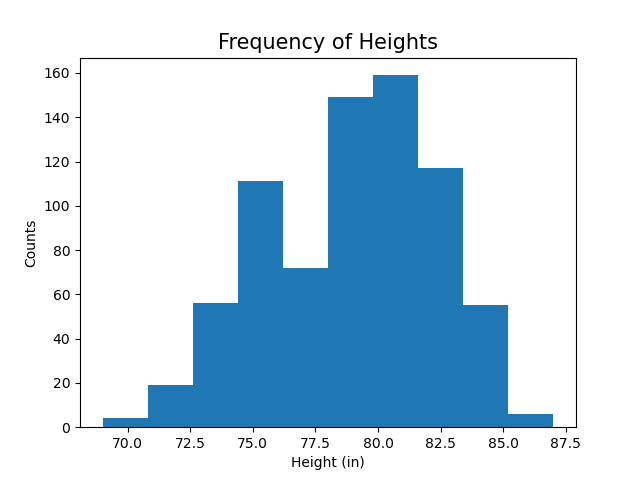

NormaltestResult(statistic=3.6924603632499275, pvalue=0.15783104056815228)


In [20]:
# Plot a histogram of the frequency for each height
height_hist_fig = plt.hist(heights)
plt.title("Frequency of Heights", size=15)
plt.xlabel("Height (in)")
plt.ylabel('Counts')
plt.show()

# Check what NormalTest shows for random samples (run more than once to see how p-value changes)
print(stats.normaltest(heights.sample(50)))


In [21]:
# Output the plot to the Output_files folder
histogram_output_image = os.path.join("Output_files", "Ht_histogram.png")
plt.savefig(histogram_output_image)
plt.show()

## Make observations about the histogram here***********

## Analyze height with scatter plots

#### Create functions to allow multiple calls
* height vs. performance measures (pts, rebounds and assists)
* height vs. salary



In [22]:
# For "height vs." scatter plots define a function for simpler plotting
def show_scatter(x_col, y_col):
    
    # Tallest player = 87 in
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    # Use iloc to pull data from certain columns each time function is called
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    # Create uniform look for the plots
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
    plt.show()
    plt.tight_layout()

In [23]:
# For "height vs." scatter plots define a function for simpler plotting and include linear reg
def calc_linear_reg_show_scatter(x_col, y_col):
    
    # Tallest player = 87 in
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    # Use iloc to pull data from certain columns each time function is called
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    # Create uniform look for the plots
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
       
    # For linear regression line, calculate the values and plot the line
    height_slope, height_int, height_r, height_p, height_std_err = stats.linregress(x_values, y_values)
    line_fit = height_slope * x_values + height_int 

    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(height_slope,height_int))
    plt.legend(fontsize=15)

    # Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

<IPython.core.display.Javascript object>


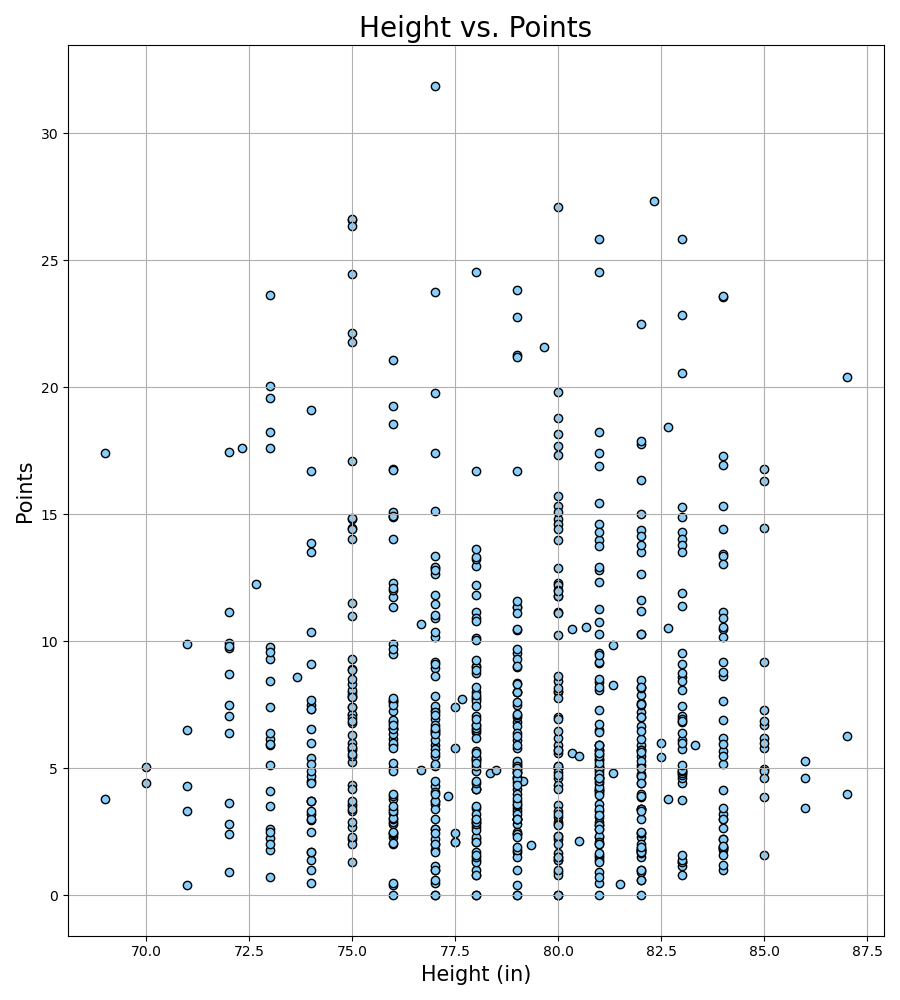

In [24]:
# Set up then call the function show_scatter using Height and Points
ht_vs_pts = plt.figure(figsize=(9,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1
ht_vs_pts = show_scatter(1, 2)

In [25]:
# Save and display the chart
ht_vs_pts_output_image = os.path.join("Output_files", "Ht_vs_pts.png")
plt.savefig(ht_vs_pts_output_image)
plt.show()

<IPython.core.display.Javascript object>


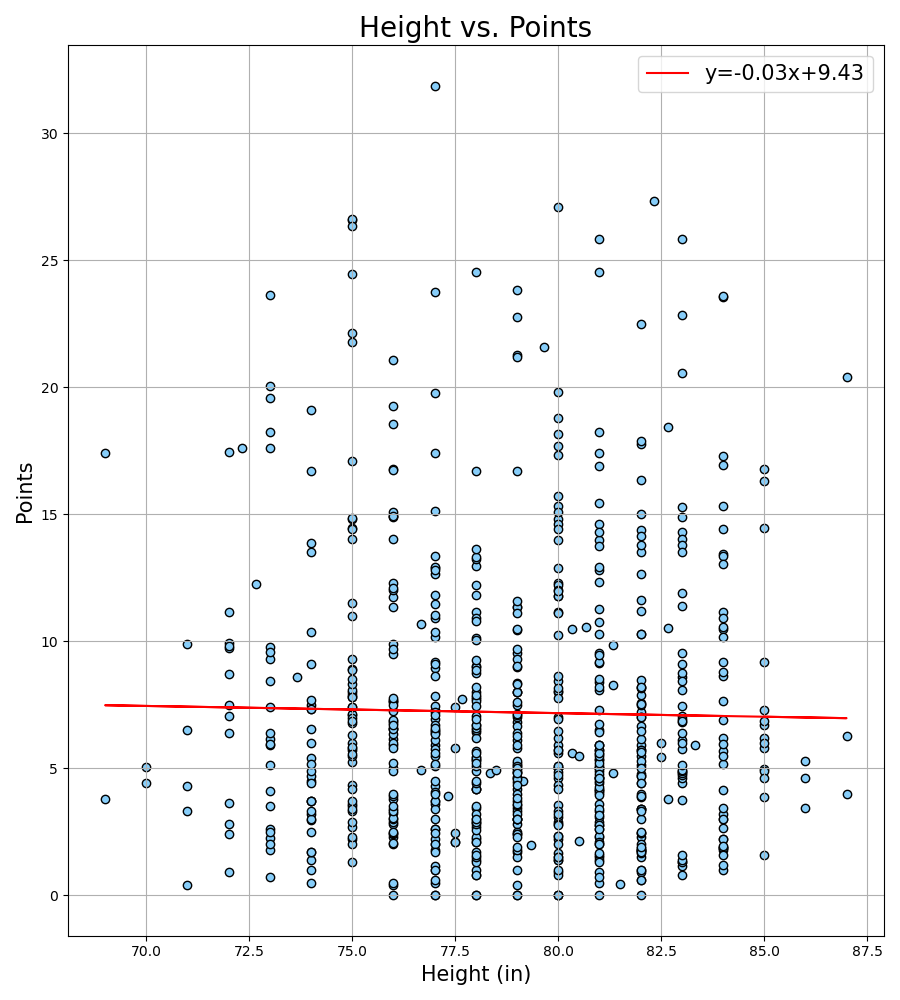

pearsonr results: (-0.017377411665314996, 0.6351390828365829).
The correlation between these two factors is -0.017.


In [26]:
# Set up then call the function show_scatter using Height and Points
ht_vs_pts_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1

ht_vs_pts_lin = calc_linear_reg_show_scatter(1, 2)

In [27]:
ht_vs_pts_lin_reg_output_image = os.path.join("Output_files", "Ht_vs_pts_lin_reg.png")
plt.savefig(ht_vs_pts_lin_reg_output_image)
plt.show()

<IPython.core.display.Javascript object>


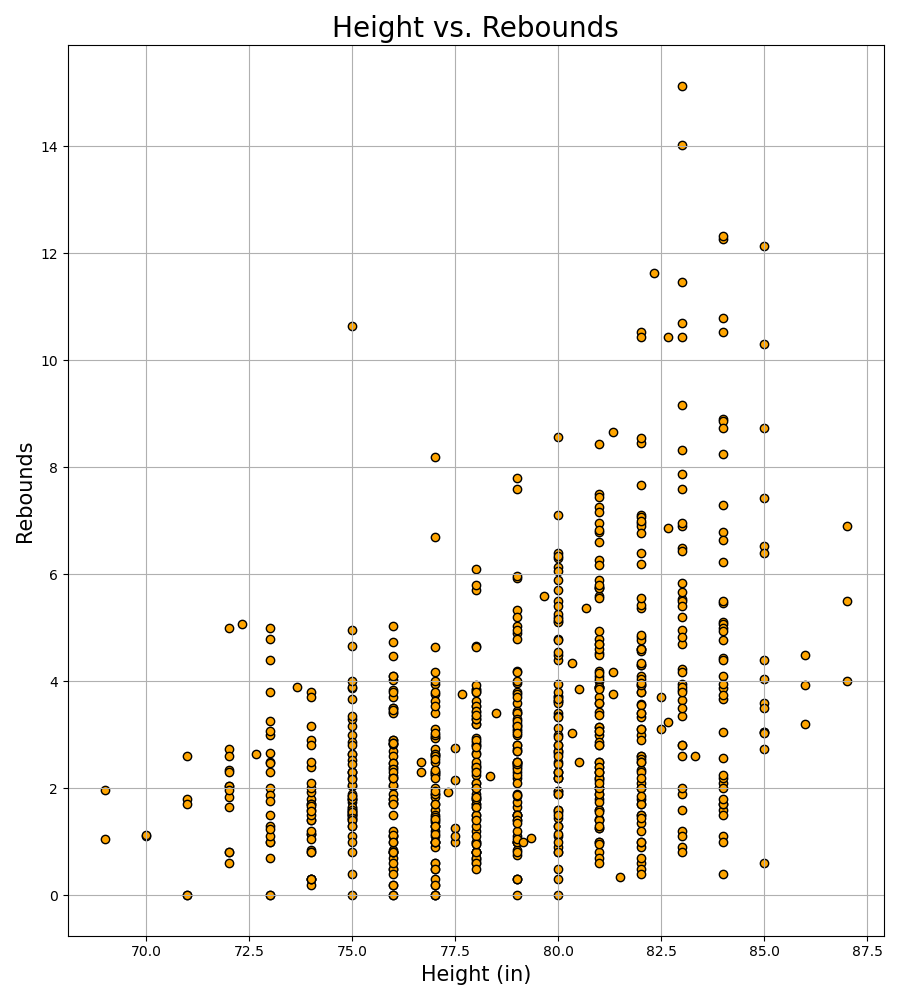

In [28]:
# Set up then call the function show_scatter using Height and Rebounds
ht_vs_reb = plt.figure(figsize=(9,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "orange"
edge = "black"
alpha_value = 1
ht_vs_reb = show_scatter(1, 3)


In [29]:
ht_vs_reb_output_image = os.path.join("Output_files", "Ht_vs_reb.png")
plt.savefig(ht_vs_reb_output_image)
plt.show()

<IPython.core.display.Javascript object>


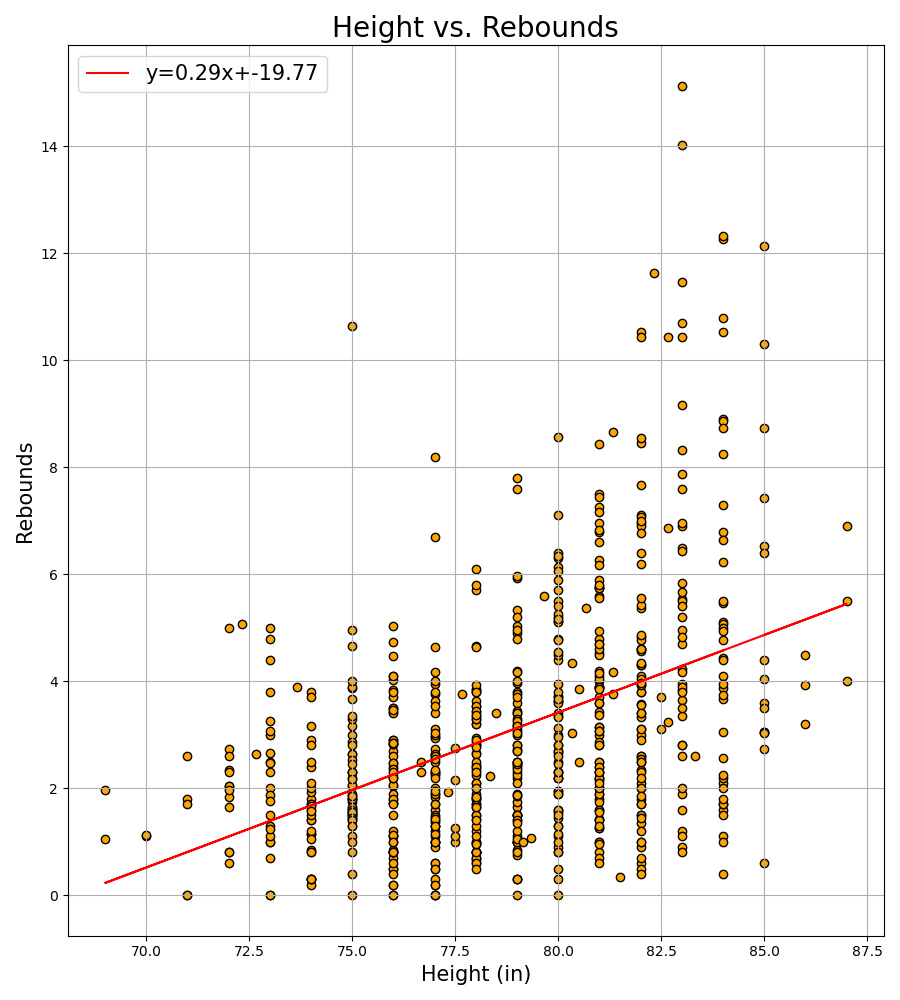

pearsonr results: (0.43453524023725276, 8.423531901409829e-36).
The correlation between these two factors is 0.435.


In [30]:
# Set up then call the function show_scatter using Height and Points
ht_vs_reb_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "orange"
edge = "black"
alpha_value = 1

ht_vs_reb_lin = calc_linear_reg_show_scatter(1, 3)

In [31]:
ht_vs_reb_lin_reg_output_image = os.path.join("Output_files", "Ht_vs_reb_lin_reg.png")
plt.savefig(ht_vs_reb_lin_reg_output_image)
plt.show()

In [32]:
# Explore the same kind of plotting, heights < mean
# Create chart showing rebounds players shorter than average

# Update the formatting
pd.options.display.float_format = "{:.2f}".format

heights_below_mean_df = nba_stats_df.loc[nba_stats_df["height (in)"] < (mean_heights_numpy)]
heights_below_mean_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
1,Aaron Brooks,72.00,3.65,0.80,1.25,Oregon,USA,MIN,<= 6ft
3,Aaron Harrison,78.00,3.45,1.65,0.90,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,"6'1"" - 6'3"""
5,Aaron Jackson,75.00,8.00,3.00,1.00,None,USA,HOU,"6'1"" - 6'3"""
6,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,"6'4"" - 6'6"""
...,...,...,...,...,...,...,...,...,...
737,Xavier Silas,77.00,0.00,1.00,0.00,Northern Illinois,USA,BOS,"6'4"" - 6'6"""
739,Yogi Ferrell,72.00,8.70,2.30,2.70,Indiana,USA,DAL,<= 6ft
742,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,"6'4"" - 6'6"""
743,Zach Lofton,76.00,0.00,0.00,0.00,New Mexico State,USA,DET,"6'4"" - 6'6"""


In [33]:
# Create function for a scatter plot of rebounds for players with ht < mean
def height_lower_mean_scatter(x_col, y_col):
    x_limit = 90
    x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = heights_below_mean_df.iloc[:,x_col]
    y_values = heights_below_mean_df.iloc[:,y_col]
    
   
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    plt.ylim(ymax=15)
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
       
    
    # For linear regression line, calculate the values and plot the line
    height_slope, height_int, height_r, height_p, height_std_err = stats.linregress(x_values, y_values)
    line_fit = height_slope * x_values + height_int 

    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(height_slope,height_int))
    plt.legend(fontsize=15)

    # Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

<IPython.core.display.Javascript object>


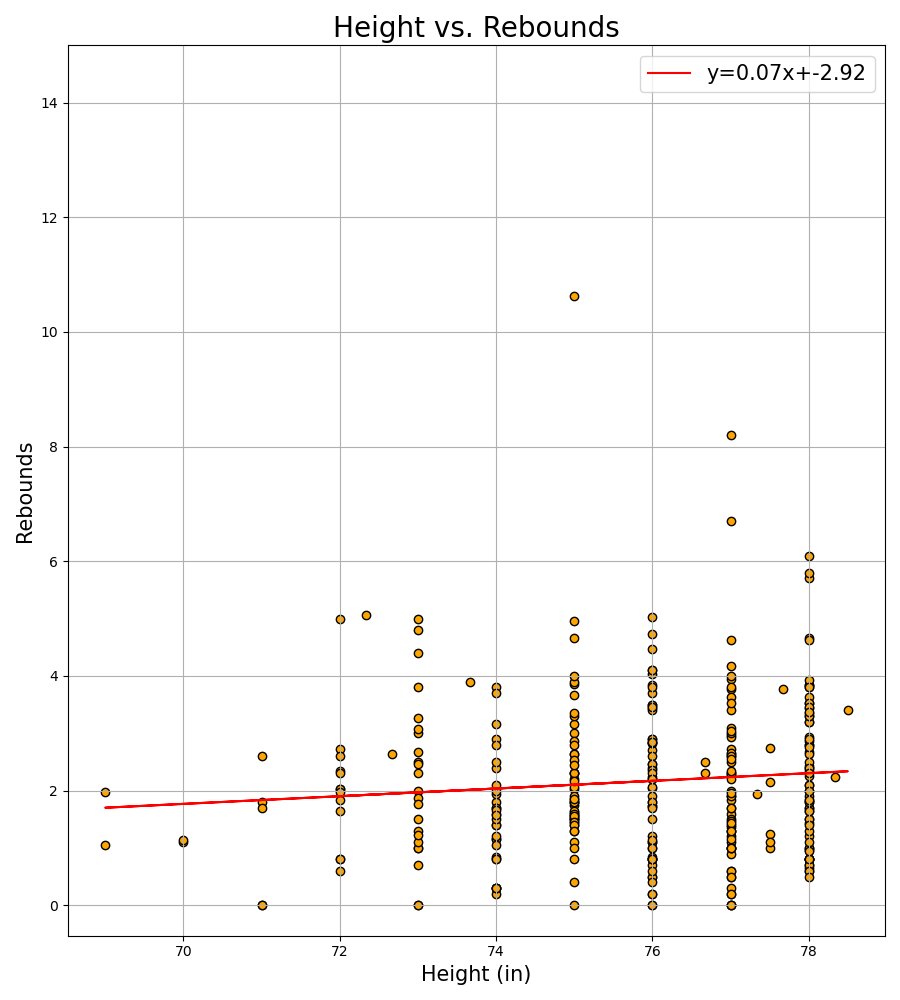

pearsonr results: (0.09624547228754901, 0.07856345203318187).
The correlation between these two factors is 0.096.


In [34]:
mean_height_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "orange"
edge = "black"
alpha_value = 1

mean_height_lin = height_lower_mean_scatter(1, 3)
plt.show()

In [35]:
mean_height_lin_output_image = os.path.join("Output_files", "Ht_LessThanMean_vs_reb_lin.png")
plt.savefig(mean_height_lin_output_image)
plt.show()

In [36]:
#create chart showing rebounds players taller than average
heights_above_mean_df = nba_stats_df.loc[nba_stats_df["height (in)"] >= (mean_heights_numpy)]
heights_above_mean_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00,2.20,1.60,0.20,Purdue,USA,DAL,"6'10"" - 7'"
2,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,"6'7"" - 6'9"""
7,Adreian Payne,82.00,3.85,1.80,0.20,Michigan State,USA,ORL,"6'10"" - 7'"
8,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,"6'10"" - 7'"
9,Al Jefferson,82.00,7.55,4.10,0.85,None,USA,IND,"6'10"" - 7'"
...,...,...,...,...,...,...,...,...,...
740,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,"6'7"" - 6'9"""
741,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,"6'10"" - 7'"
744,Zach Randolph,81.00,14.30,7.45,1.95,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00,5.13,4.83,1.60,None,Georgia,GSW,"6'10"" - 7'"


In [37]:
# Create function for a scatter plot of rebounds for players with ht > mean
def height_above_mean_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = heights_above_mean_df.iloc[:,x_col]
    y_values = heights_above_mean_df.iloc[:,y_col]
    
   
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.ylim(ymax=15)
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
       
    
    # For linear regression line, calculate the values and plot the line
    height_slope, height_int, height_r, height_p, height_std_err = stats.linregress(x_values, y_values)
    line_fit = height_slope * x_values + height_int 

    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(height_slope,height_int))
    plt.legend(fontsize=15)

    # Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

<IPython.core.display.Javascript object>


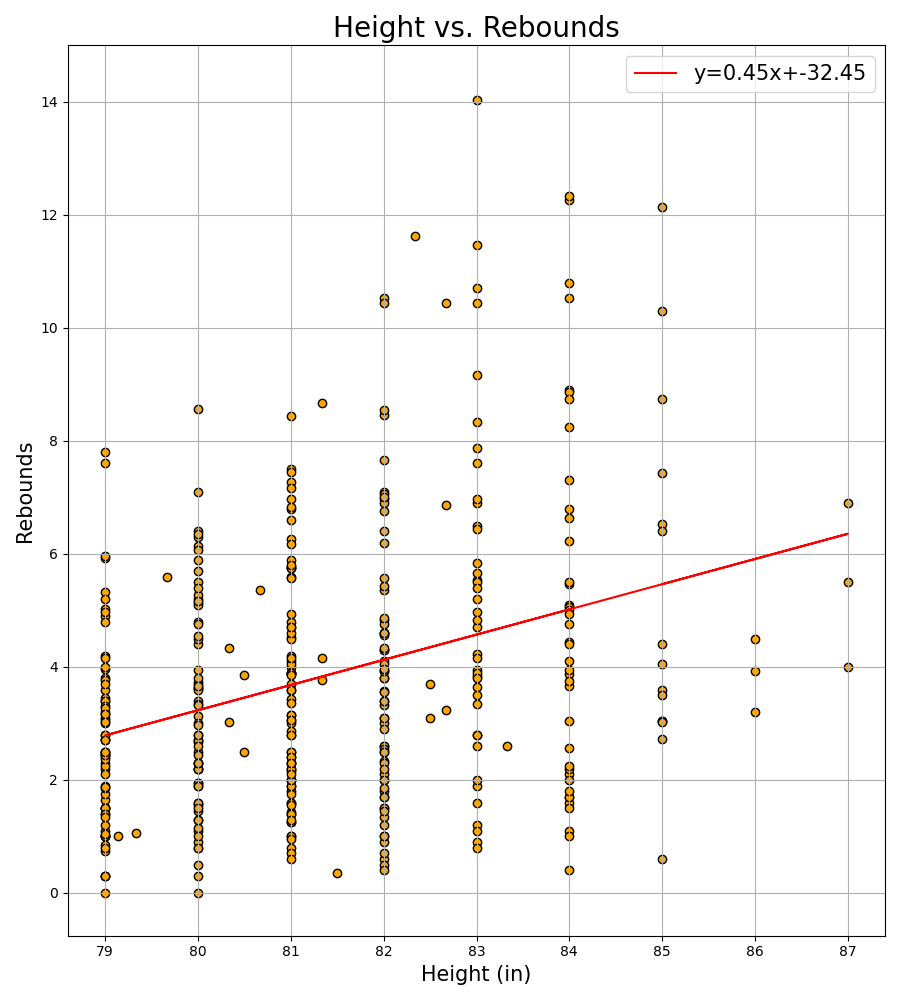

pearsonr results: (0.3216356492219352, 2.1519075913158547e-11).
The correlation between these two factors is 0.322.


In [38]:
mean_above_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "orange"
edge = "black"
alpha_value = 1

mean_above_lin = height_above_mean_scatter(1, 3)
plt.show()

In [39]:
mean_above_lin_output_image = os.path.join("Output_files", "Ht_GreaterThanMean_vs_reb_lin.png")
plt.savefig(mean_above_lin_output_image)
plt.show()

<IPython.core.display.Javascript object>


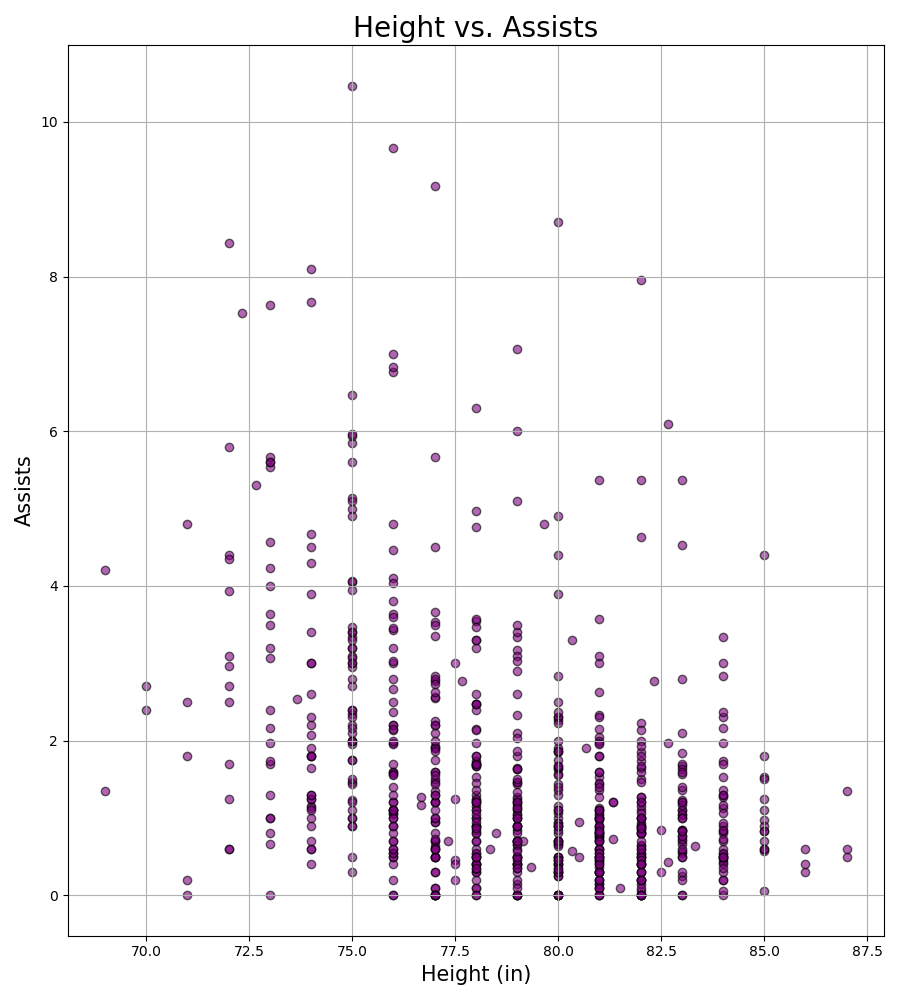

In [40]:
# Set up then call the function show_scatter using Height and Assists
ht_vs_assists = plt.figure(figsize=(9,10))

plot_title = "Height vs. Assists"
x_label_name = "Height (in)"
y_label_name = "Assists"
face = "purple"
edge = "black"
alpha_value = .60
ht_vs_assists = show_scatter(1, 4)

In [41]:
ht_vs_ast_output_image = os.path.join("Output_files", "Ht_vs_ast.png")
plt.savefig(ht_vs_ast_output_image)
plt.show()

<IPython.core.display.Javascript object>


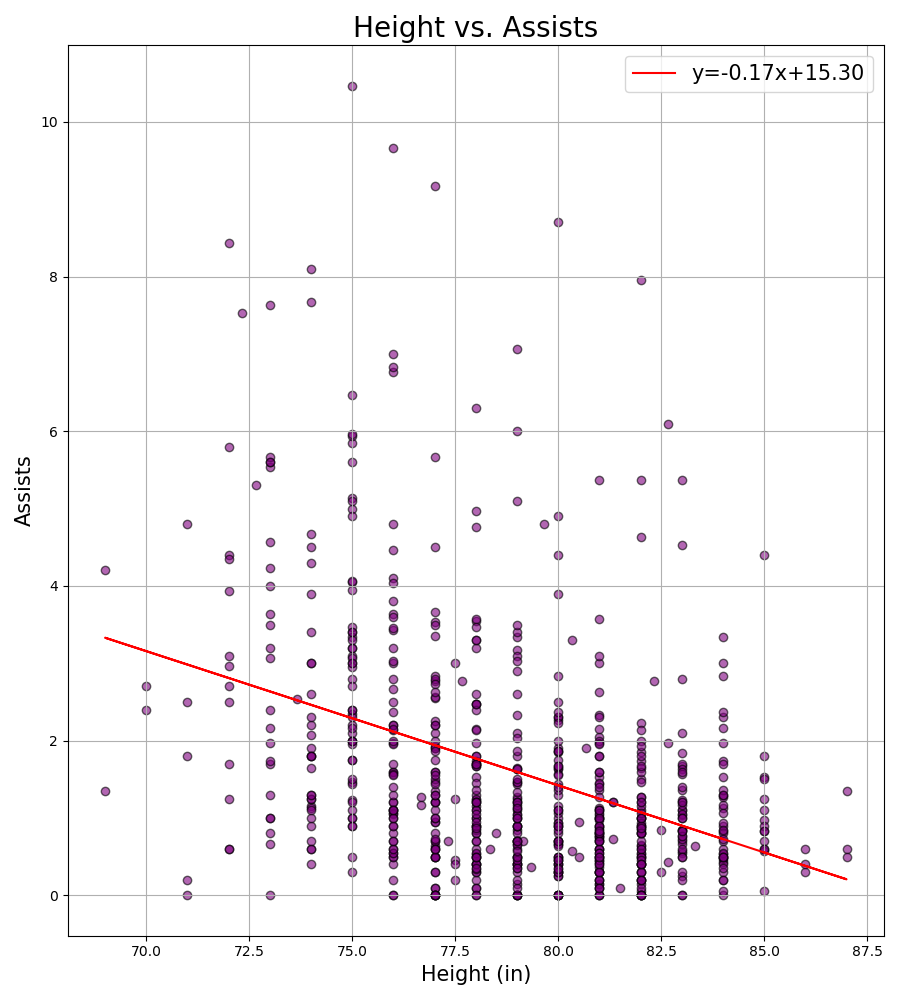

pearsonr results: (-0.3698558763535108, 1.1604091735536877e-25).
The correlation between these two factors is -0.37.


In [42]:
# Create the plot with the linear regression line added
assist_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Assists"
x_label_name = "Height (in)"
y_label_name = "Assists"
face = "purple"
edge = "black"
alpha_value = .6

assist_lin = calc_linear_reg_show_scatter(1, 4)

In [43]:
# Output the plot to the Output_files folder
ht_vs_ast_lin_reg_output_image = os.path.join("Output_files", "Ht_vs_ast_lin.png")
plt.savefig(ht_vs_ast_lin_reg_output_image)
plt.show()

In [44]:
nba_stats_with_salary_df.describe()

,height (in),pts,reb,ast,2020-21 Salary ($),2020-21 Salary (Millions)
count,324.00,324.00,324.00,324.00,324.00,324.00
mean,79.04,10.12,4.09,2.22,9795961.42,9.80
std,3.27,6.07,2.45,1.87,10077490.49,10.08
min,72.00,0.00,0.20,0.00,50000.00,0.05
25%,76.67,5.69,2.47,0.93,2374346.25,2.37
50%,79.00,8.60,3.63,1.67,5536666.50,5.54
75%,82.00,13.68,5.03,3.00,13295759.25,13.30
max,85.00,31.87,15.13,10.47,43006362.00,43.01


In [45]:
# For Height v. salary plot and linear regression
def salary_show_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(70, x_limit, 3)
        
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = nba_stats_with_salary_df.iloc[:,x_col]
    y_values = nba_stats_with_salary_df.iloc[:,y_col]
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
    
# For linear regression line, calculate the values and plot the line
    sal_slope, sal_int, sal_r, sal_p, sal_std_err = stats.linregress(x_values, y_values)
    sal_line_fit = sal_slope * x_values + sal_int 

    plt.plot(x_values, sal_line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(sal_slope,sal_int))
    plt.legend(fontsize=15)
    
# Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.tight_layout()
    plt.show()
    

<IPython.core.display.Javascript object>


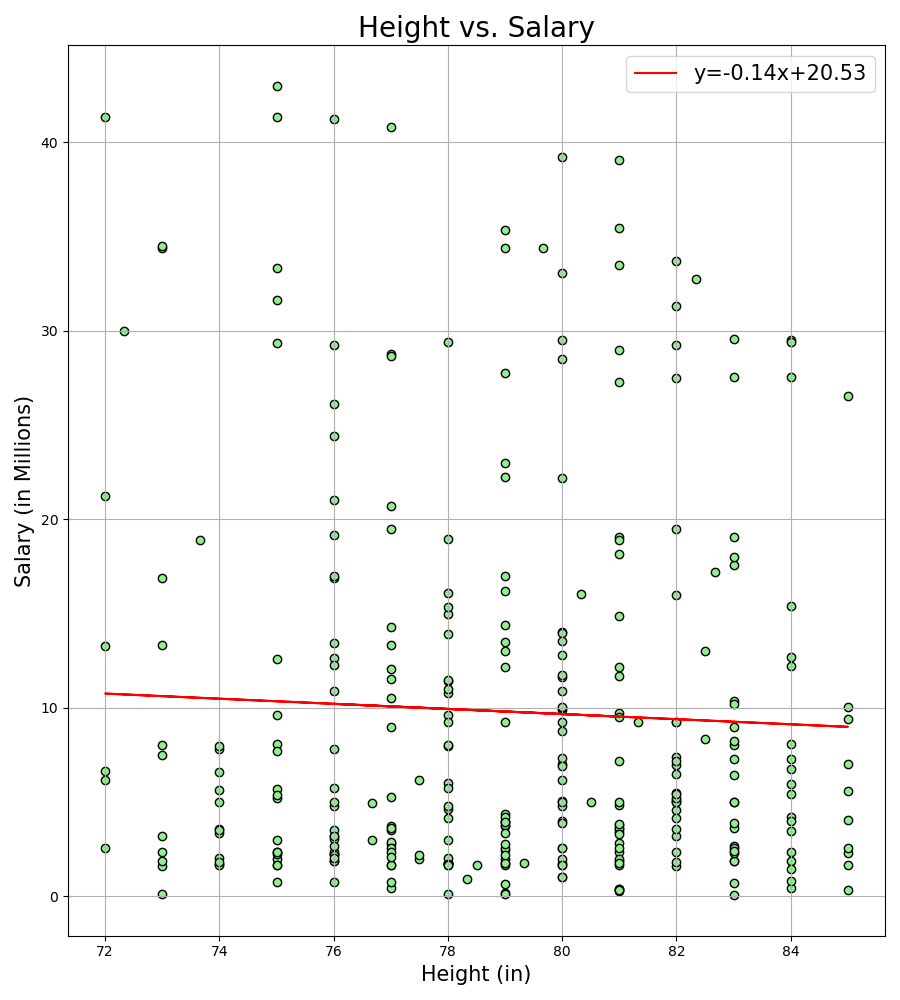

pearsonr results: (-0.044071115087400095, 0.4291784196774443).
The correlation between these two factors is -0.044.


In [46]:
salary_lin = plt.figure(figsize=(9,10))

plot_title = "Height vs. Salary"
x_label_name = "Height (in)"
y_label_name = "Salary (in Millions)"
face = "lightgreen"
edge = "black"
alpha_value = 1

salary_lin = salary_show_scatter(1,9)

In [47]:
# Output the plot to the Output_files folder
ht_vs_sal_lin_reg_output_image = os.path.join("Output_files", "Ht_vs_sal_lin.png")
plt.savefig(ht_vs_sal_lin_reg_output_image)
plt.show()

## Analyze salary with scatter plots

#### Create function to allow multiple calls
* salary vs. performance measures (pts, rebounds and assists)


In [48]:
# For Height v. salary create function for plot and linear regression
def salary_show_scatter(x_col, y_col):
      
    x_values = nba_stats_with_salary_df.iloc[:,x_col]
    y_values = nba_stats_with_salary_df.iloc[:,y_col]
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.title(plot_title, size=20)
    plt.xlabel(x_label_name, size=15)
    plt.ylabel(y_label_name, size=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid()
    
# For linear regression line, calculate the values and plot the line
    sal_slope, sal_int, sal_r, sal_p, sal_std_err = stats.linregress(x_values, y_values)
    sal_line_fit = sal_slope * x_values + sal_int 

    plt.plot(x_values, sal_line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(sal_slope,sal_int))
    plt.legend(fontsize=15)
# Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

<IPython.core.display.Javascript object>


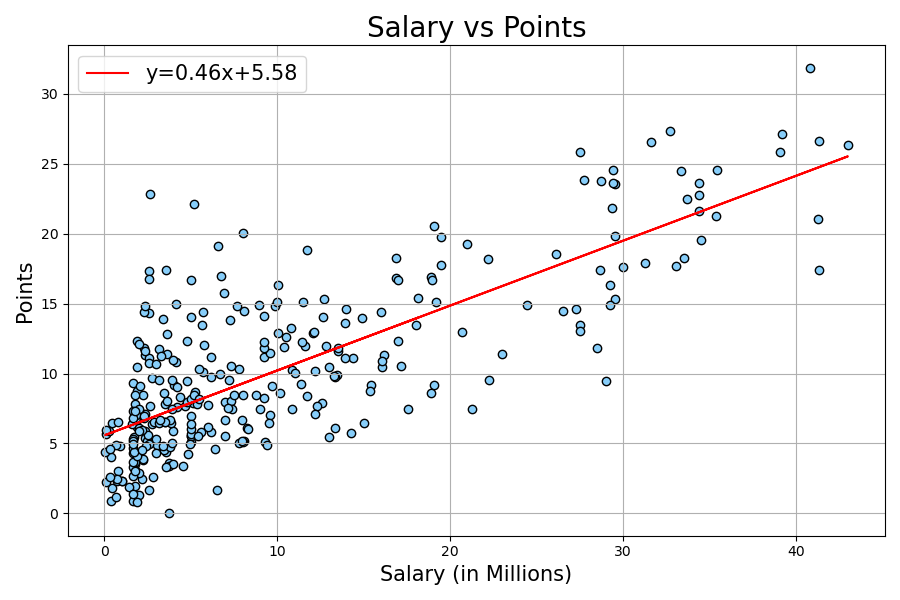

pearsonr results: (0.7696157006414956, 1.0565978011907831e-64).
The correlation between these two factors is 0.77.


In [49]:
salary_lin = plt.figure(figsize=(9,6))

plot_title = "Salary vs Points"
x_label_name = "Salary (in Millions)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1

salary_lin = salary_show_scatter(9,2)

In [50]:
# Output the plot to the Output_files folder
sal_vs_pts_lin_reg_output_image = os.path.join("Output_files", "Sal_vs_pts_lin.png")
plt.savefig(sal_vs_pts_lin_reg_output_image)
plt.show()

<IPython.core.display.Javascript object>


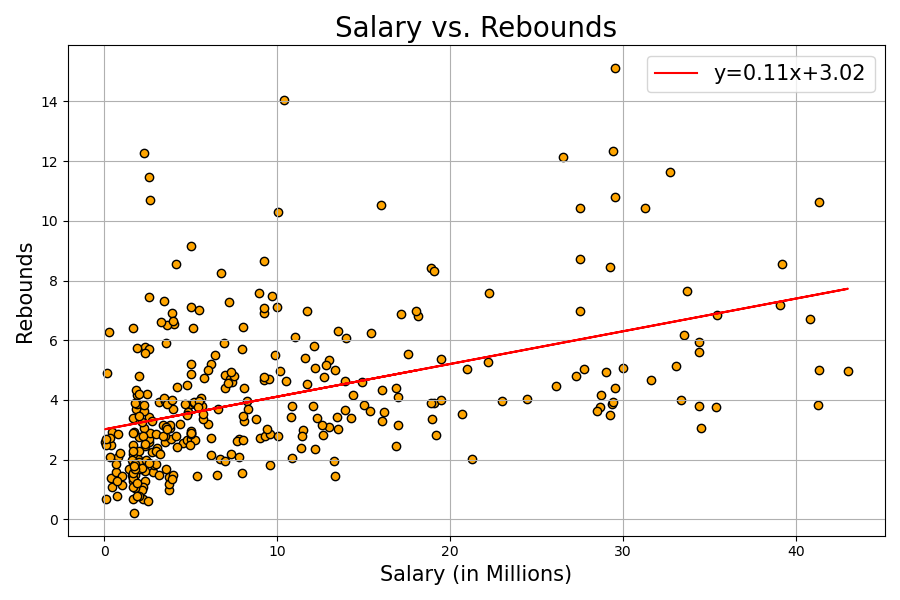

pearsonr results: (0.45025171413569315, 1.405623025197144e-17).
The correlation between these two factors is 0.45.


In [51]:
salary_lin = plt.figure(figsize=(9,6))

plot_title = "Salary vs. Rebounds"
x_label_name = "Salary (in Millions)"
y_label_name = "Rebounds"
face = "orange"
edge = "black"
alpha_value = 1

salary_lin = salary_show_scatter(9, 3)

In [52]:
# Output the plot to the Output_files folder
sal_vs_reb_lin_reg_output_image = os.path.join("Output_files", "Sal_vs_reb_lin.png")
plt.savefig(sal_vs_reb_lin_reg_output_image)
plt.show()

<IPython.core.display.Javascript object>


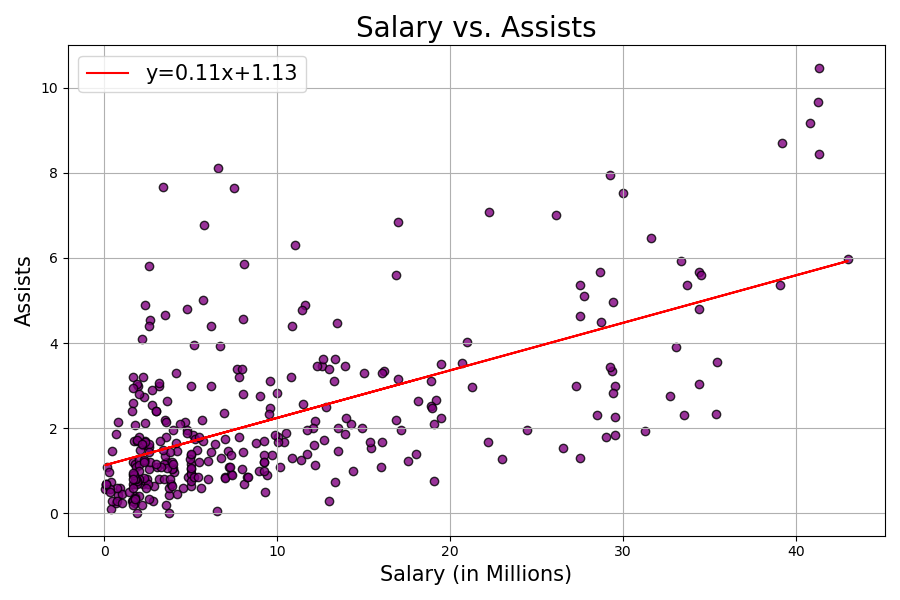

pearsonr results: (0.601504128402172, 2.9064123213974663e-33).
The correlation between these two factors is 0.602.


In [53]:
# Set up then call the function show_scatter using Height and Points
salary_lin = plt.figure(figsize=(9,6))

plot_title = "Salary vs. Assists"
x_label_name = "Salary (in Millions)"
y_label_name = "Assists"
face = "purple"
edge = "black"
alpha_value = .8

salary_lin = salary_show_scatter(9, 4)

In [54]:
# Output the plot to the Output_files folder
sal_vs_ast_lin_reg_output_image = os.path.join("Output_files", "Sal_vs_ast_lin.png")
plt.savefig(sal_vs_ast_lin_reg_output_image)
plt.show()

In [55]:
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21 Salary ($),2020-21 Salary (Millions),Salary Range
0,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,18136364.00,18.14,15M to 19.9M
1,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,2345640.00,2.35,1M to 2.4M
2,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,1752950.00,1.75,1M to 2.4M
3,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,27500000.00,27.50,> 20M
4,Al-Farouq Aminu,81.00,9.13,7.50,1.37,Wake Forest,USA,POR,9720900.00,9.72,7.5M to 9.9M
...,...,...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.00,10.93,6.63,1.97,Kentucky,USA,SAC,4000000.00,4.00,2.5M to 4.9M
320,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,321893.00,0.32,< 1M
321,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,5406255.00,5.41,5M to 7.4M
322,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,19500000.00,19.50,15M to 19.9M


In [56]:
# Below is a bar graph of all heights plotted with points

<IPython.core.display.Javascript object>


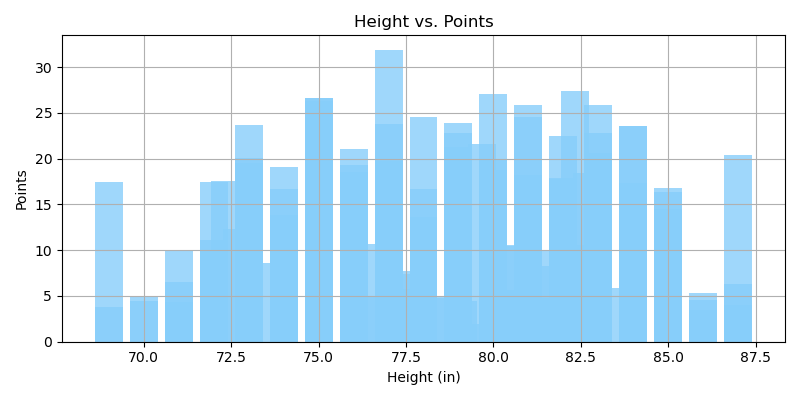

In [57]:
# The maximum x value for our chart will be about 90
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure2 = plt.figure(figsize=(8,4))

plt.bar(nba_stats_df['height (in)'], nba_stats_df['pts'], color='lightskyblue', alpha=.80, align="center")
plt.title('Height vs. Points')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

In [58]:
# Export final csv results
cleaned_nba_stats_with_salary_df_output_path = os.path.join('Output_files', 'cleaned_player_salaries.csv')
nba_stats_with_salary_df.to_csv(cleaned_nba_stats_with_salary_df_output_path, header=True)

In [59]:
nba_stats_df_output_path = os.path.join('Output_files', 'cleaned_player_stats.csv')
nba_stats_df.to_csv(nba_stats_df_output_path, header=True)

In [60]:
nba_stats_breakout_by_season_output_path = os.path.join('Output_files', 'cleaned_player_stats_breakout.csv')
nba_stats_breakout_by_season_df.to_csv(nba_stats_breakout_by_season_output_path, header=True)